### Defining the problem statement : 

Jamboree education recently launched a feature where students/learners can come to their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian perspective.

Our task is to help the company what factors are important in graduate admissions and how these factors are interrelated among themselves. It will also help predict one's chances of admission.

In [2]:
# importing the libraries : 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import warnings 
warnings.filterwarnings("ignore")



In [3]:
df = pd.read_csv(r"C:\Users\mahik\Documents\GitHub\Jamboree-Education-classification\Admission_Predict_Ver1.1.csv")

In [4]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
df.shape

(500, 9)

Defining the target -->> Chance to Admit 

So, we need to create a model that could give out the probabality of admission given the score of a student.

In [6]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [7]:
df = df.drop(columns=["Serial No."],axis=1)

In [8]:
# Checking the null values and duplicate values  
df.isna().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [9]:
df.duplicated().sum()
# No null, duplicate values -- looks like the data is already pre-processed.

0

In [10]:
df.columns = df.columns.str.lower()

In [11]:
df.columns = df.columns.str.strip()
df.columns

Index(['gre score', 'toefl score', 'university rating', 'sop', 'lor', 'cgpa',
       'research', 'chance of admit'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gre score          500 non-null    int64  
 1   toefl score        500 non-null    int64  
 2   university rating  500 non-null    int64  
 3   sop                500 non-null    float64
 4   lor                500 non-null    float64
 5   cgpa               500 non-null    float64
 6   research           500 non-null    int64  
 7   chance of admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [13]:
df["university rating"].value_counts()

3    162
2    126
4    105
5     73
1     34
Name: university rating, dtype: int64

In [14]:
df["research"].value_counts()
# The data has already been pre-processed and the features are encoded.

1    280
0    220
Name: research, dtype: int64

In [15]:
df["sop"].value_counts()


4.0    89
3.5    88
3.0    80
2.5    64
4.5    63
2.0    43
5.0    42
1.5    25
1.0     6
Name: sop, dtype: int64

Looking at the size of the data we can understand that the data that's been provided is a sample of entire population.

### Exploratory Data Analysis

In [16]:
# Univariate - Analysis 
df.columns

Index(['gre score', 'toefl score', 'university rating', 'sop', 'lor', 'cgpa',
       'research', 'chance of admit'],
      dtype='object')

<AxesSubplot: xlabel='sop', ylabel='count'>

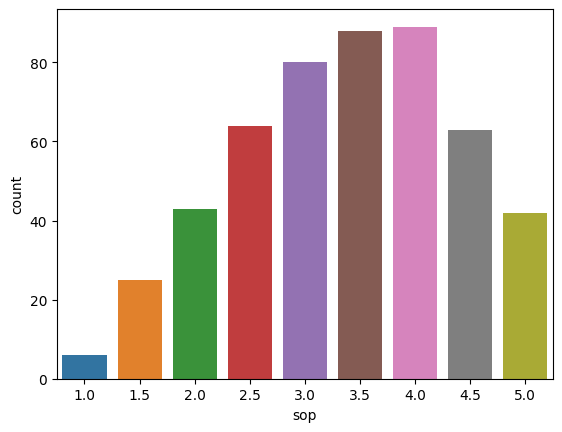

In [17]:
sns.countplot(data=df,x="sop")

In [18]:
df.dtypes

gre score              int64
toefl score            int64
university rating      int64
sop                  float64
lor                  float64
cgpa                 float64
research               int64
chance of admit      float64
dtype: object

<AxesSubplot: ylabel='Density'>

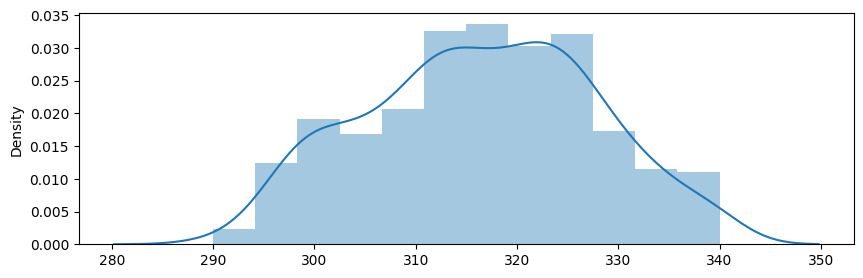

In [19]:
plt.figure(figsize=(10,3))
sns.distplot(x=df["gre score"])

<AxesSubplot: ylabel='Density'>

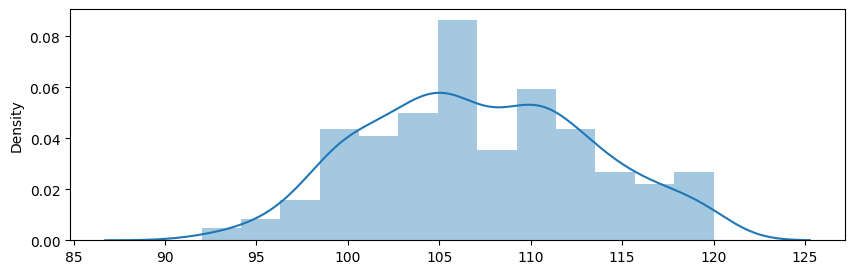

In [20]:
plt.figure(figsize=(10,3))
sns.distplot(x=df["toefl score"])

<AxesSubplot: xlabel='cgpa', ylabel='Density'>

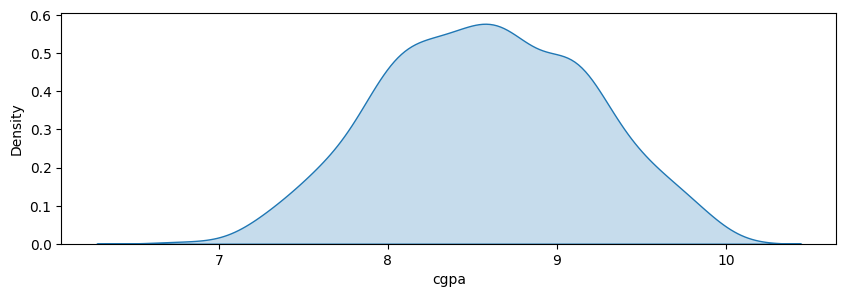

In [21]:
plt.figure(figsize=(10,3))
sns.kdeplot(x=df["cgpa"],shade=True)

We can see that students with varying gre, TOEFL,cgpa scores are applying for foreign universities.

### Let's check the Bi- Variate Analysis

How one features varies with respect to others and their relationship with respect to their chance of getting an admission.

In [22]:
df.columns

Index(['gre score', 'toefl score', 'university rating', 'sop', 'lor', 'cgpa',
       'research', 'chance of admit'],
      dtype='object')

<AxesSubplot: xlabel='gre score', ylabel='toefl score'>

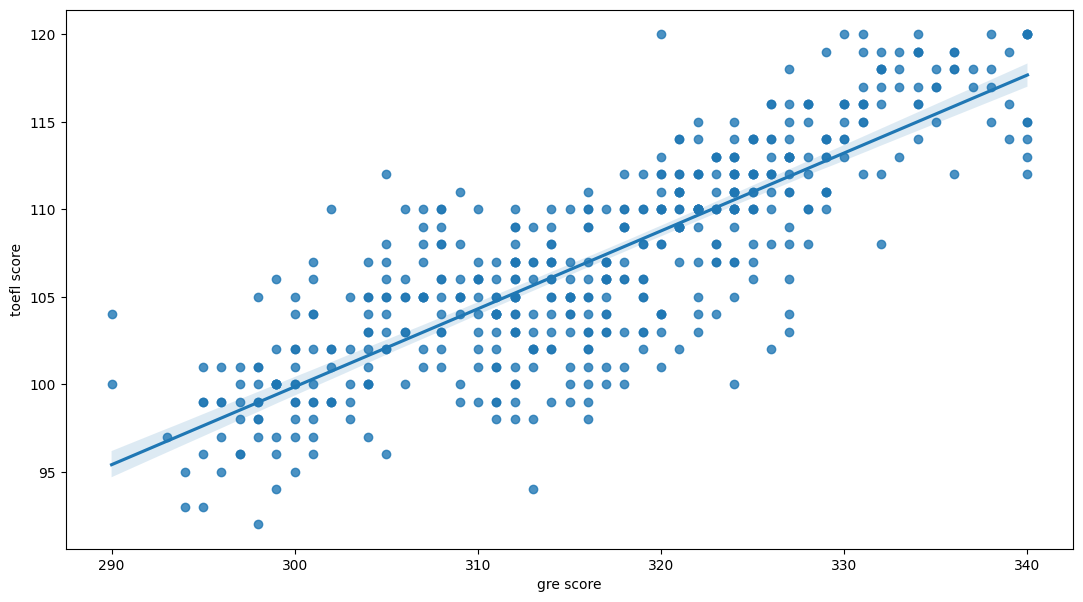

In [37]:
plt.figure(figsize=(13,7))
sns.regplot(data=df,x='gre score',y= 'toefl score')

<AxesSubplot: xlabel='gre score', ylabel='cgpa'>

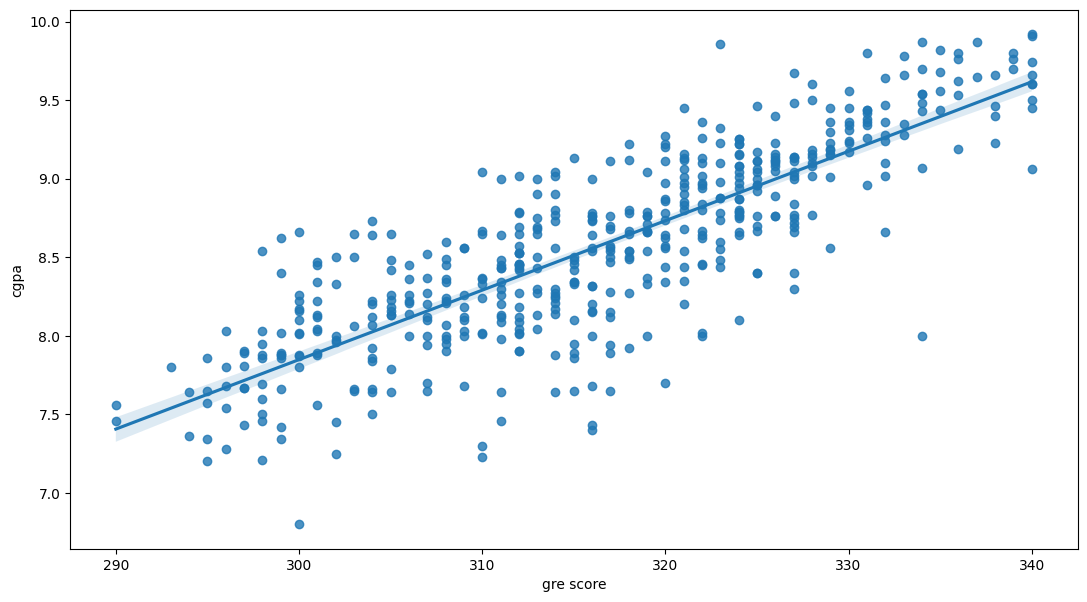

In [39]:
plt.figure(figsize=(13,7))
sns.regplot(data=df,x='gre score',y= 'cgpa')

WE could see a good co-relation between gre_score with TOEFL , cgpa score. 
Let's check with rest of the features.

<Figure size 1000x700 with 0 Axes>

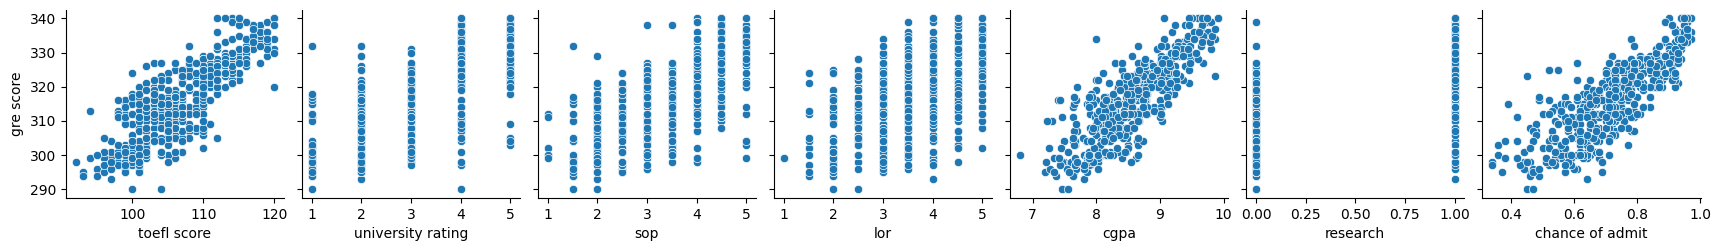

In [53]:
plt.figure(figsize=(10,7))
sns.pairplot(df,y_vars="gre score", x_vars=['toefl score', 'university rating', 'sop', 'lor', 'cgpa','research', 'chance of admit'])
plt.show()
# GRE vs Rest

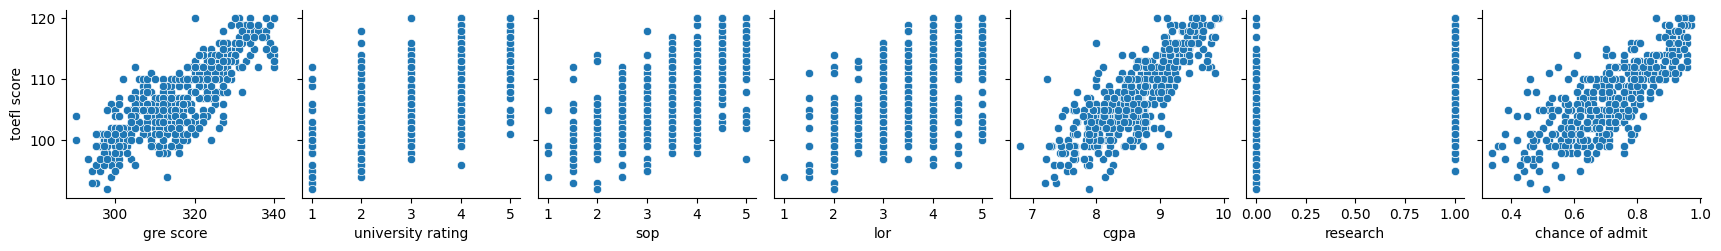

In [54]:
sns.pairplot(df,y_vars="toefl score", x_vars=['gre score', 'university rating', 'sop', 'lor', 'cgpa','research', 'chance of admit'])
# TOEFL vs Rest

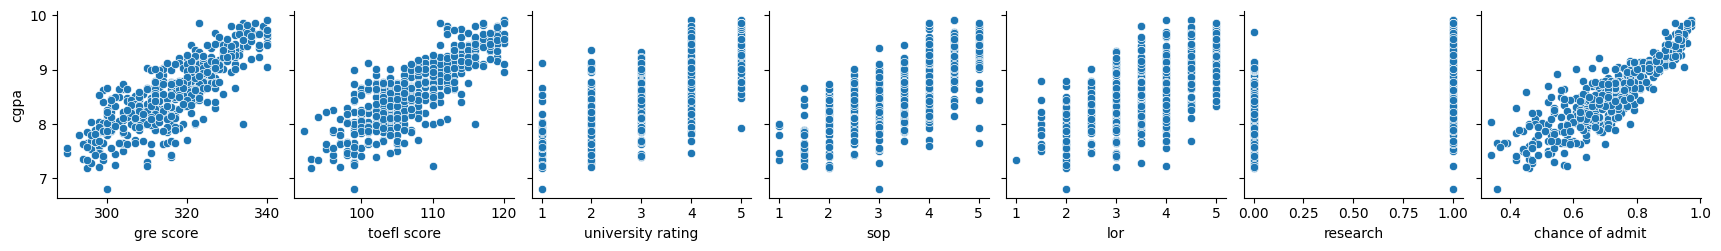

In [56]:
sns.pairplot(df,y_vars="cgpa", x_vars=['gre score','toefl score','university rating', 'sop', 'lor','research', 'chance of admit'])
#cgpa vs rest

- From the above plots we can visually see that gre_score , TOEFL are not only co-related with 
   each other but they are also co-related with "Chance of admit".

- If we look closely we can also see that CGPA is co-related with other features. 

- We can make an assumption that a student with good CGPA having high gre_score , TOEFL score has a higher chance of getting admission in a foreign university.

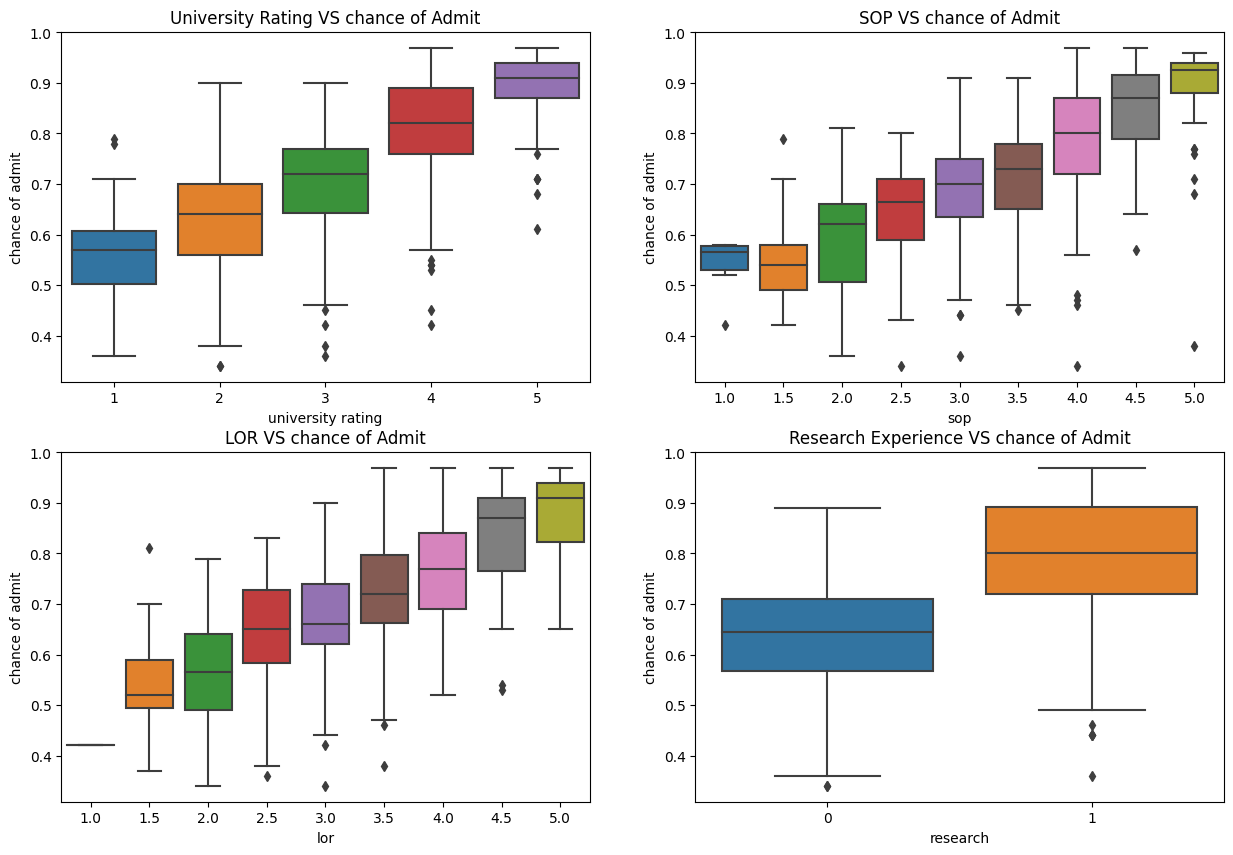

In [57]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.boxplot(data = df, y = "chance of admit", x = "university rating")
plt.title("University Rating VS chance of Admit")

plt.subplot(2,2,2)
sns.boxplot(data = df, y = "chance of admit", x = "sop")
plt.title("SOP VS chance of Admit")

plt.subplot(2,2,3)
sns.boxplot(data = df, y = "chance of admit", x = "lor")
plt.title("LOR VS chance of Admit")

plt.subplot(2,2,4)
sns.boxplot(data = df, y = "chance of admit", x = "research")
plt.title("Research Experience VS chance of Admit")
plt.show()

- From the above an university with a 5 star rating has a chance of admit only if  the median probability is greater than 0.9 and ofcourse few exceptions has been made.

Let's check the co-relation between each variable with a heatmap which uses co-realtion score.

<AxesSubplot: >

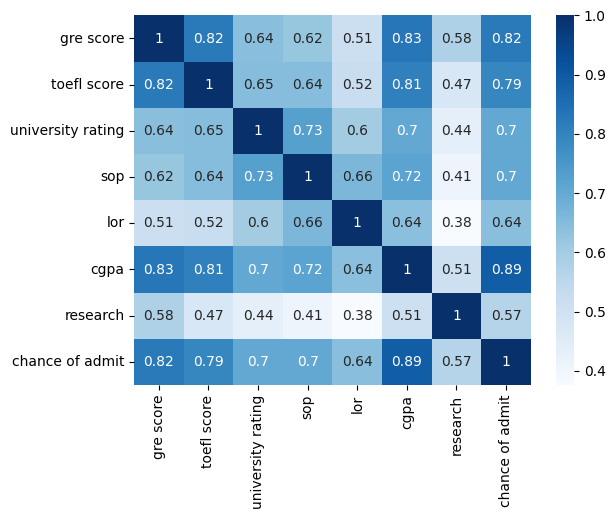

In [60]:
sns.heatmap(df.corr(method="spearman"),annot=True,cmap="Blues")

- We can see that gre_score , toefl , cgpa are not only related with the chance of admit  but they are also co-related with each other.

- This multi-colinearity could be a problem while building a machine learning algorithm as this could mess up the feature importances.

First let's build a simple linear regression model without removing
multi-colinearity and then we will try the same after removing multi-colinearity.

In [62]:
x= df.drop(columns=["chance of admit"],axis = 1)
y = df["chance of admit"]


In [68]:
# train-test-split
x_train , x_test ,y_train ,y_test = train_test_split(x,y,test_size=0.20,shuffle=True,random_state=42)

In [70]:
# Standardizing the data 
std = StandardScaler()
x_train = pd.DataFrame(std.fit_transform(x_train),columns=x_train.columns)

In [72]:
x_test

,gre score,toefl score,university rating,sop,lor,cgpa,research
361,334,116,4,4.0,3.5,9.54,1
73,314,108,4,4.5,4.0,9.04,1
374,315,105,2,2.0,2.5,7.65,0
155,312,109,3,3.0,3.0,8.69,0
104,326,112,3,3.5,3.0,9.05,1
...,...,...,...,...,...,...,...
347,299,94,1,1.0,1.0,7.34,0
86,315,106,3,4.5,3.5,8.42,0
75,329,114,2,2.0,4.0,8.56,1
438,318,110,1,2.5,3.5,8.54,1


In [73]:
x_test = pd.DataFrame(std.transform(x_test),columns=x_test.columns)

,gre score,toefl score,university rating,sop,lor,cgpa,research
0,1.576604,1.424271,0.775459,0.633979,0.021730,1.597217,0.895434
1,-0.248961,0.109306,0.775459,1.141162,0.564984,0.764683,0.895434
2,-0.157683,-0.383805,-0.972054,-1.394754,-1.064777,-1.549762,-1.116777
3,-0.431518,0.273677,-0.098298,-0.380387,-0.521524,0.181909,-1.116777
4,0.846378,0.766789,-0.098298,0.126796,-0.521524,0.781333,0.895434
...,...,...,...,...,...,...,...
95,-1.618135,-2.191882,-1.845810,-2.409120,-2.694538,-2.065934,-1.116777
96,-0.157683,-0.219435,-0.098298,1.141162,0.021730,-0.267660,-1.116777
97,1.120212,1.095530,-0.972054,-1.394754,0.564984,-0.034550,0.895434
98,0.116152,0.438048,-1.845810,-0.887570,0.021730,-0.067852,0.895434
